<a href="https://colab.research.google.com/github/junior19071983/analise-dados-sql-excel./blob/main/impacto_regiao_vendas_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Análise do Impacto da Região nas Vendas — Regressão Linear

**Autor:** José Alexandre dos Santos Junior

**Ferramentas:** Python (Pandas, Scikit-Learn, Matplotlib)  
**Objetivo:** Avaliar o impacto das regiões do Brasil no total de vendas dos vendedores, utilizando um modelo de regressão linear.

---

## 🧠 Etapas do Projeto
1. Leitura e limpeza da base de dados (.csv)  
2. Conversão de variáveis categóricas (Região) em dummies  
3. Treinamento do modelo de Regressão Linear  
4. Interpretação dos coeficientes (impacto por região)  
5. Visualização dos resultados (gráfico de vendas reais x previstas)

---

## 📈 Resultados
- O modelo mostra que regiões **Sudeste, Sul e Nordeste** apresentam coeficientes negativos, indicando menor impacto no total de vendas em relação ao **Centro-Oeste (base)**.  
- As previsões ficaram próximas dos valores reais, mostrando boa coerência entre variáveis.  

---

## 💡 Conclusão
A análise demonstra como a regressão linear pode ser aplicada em um cenário real de negócios, ajudando gestores a identificar padrões de desempenho por região e tomar decisões baseadas em dados.


In [3]:
# ===========================================
# REGRESSÃO LINEAR - IMPACTO DAS REGIÕES NAS VENDAS
# ===========================================

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

import pandas as pd



In [4]:
# Ler o arquivo indicando que não há cabeçalho
df = pd.read_csv('teste regressão domingo.csv', sep=';', header=None)

# Definir os nomes corretos das colunas
df.columns = ['Nome do Vendedor', 'Região', 'Total']

# Verificar
print(df.head())
print(df.columns.tolist())

     Nome do Vendedor        Região    Total
0      Lucas Oliveira      Nordeste  6573180
1       Gustavo Silva      Nordeste  6177540
2         Kátia Costa  Centro-Oeste  6054680
3        Karla Santos       Sudeste  5801620
4  Gabriela Rodrigues  Centro-Oeste  5792980
['Nome do Vendedor', 'Região', 'Total']


In [5]:
# 2️⃣ TRATAR DADOS
# Conferir tipos e valores ausentes
print(df.info(), "\n")
print("Valores nulos por coluna:\n", df.isnull().sum(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nome do Vendedor  36 non-null     object
 1   Região            36 non-null     object
 2   Total             36 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes
None 

Valores nulos por coluna:
 Nome do Vendedor    0
Região              0
Total               0
dtype: int64 



In [6]:
# 3️⃣ CONVERTER VARIÁVEIS CATEGÓRICAS (Região) EM NUMÉRICAS
df_dummies = pd.get_dummies(df, columns=['Região'], drop_first=True)

In [7]:
# 4️⃣ DEFINIR VARIÁVEIS
X = df_dummies.drop(['Nome do Vendedor', 'Total'], axis=1)  # variáveis independentes
y = df_dummies['Total']  # variável dependente

In [8]:
# 5️⃣ TREINAR O MODELO
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [9]:
# 6️⃣ FAZER PREVISÕES
df['Previsão'] = model.predict(X)



In [10]:
# 7️⃣ RESULTADOS
print("Coeficientes do modelo:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:,.2f}")
print(f"Intercepto: {model.intercept_:,.2f}\n")

print("Tabela com previsão:")
print(df[['Nome do Vendedor', 'Região', 'Total', 'Previsão']], "\n")

Coeficientes do modelo:
Região_Nordeste: -438,804.86
Região_Sudeste: -657,480.86
Região_Sul: -310,389.52
Intercepto: 4,587,842.86

Tabela com previsão:
      Nome do Vendedor        Região    Total      Previsão
0       Lucas Oliveira      Nordeste  6573180  4.149038e+06
1        Gustavo Silva      Nordeste  6177540  4.149038e+06
2          Kátia Costa  Centro-Oeste  6054680  4.587843e+06
3         Karla Santos       Sudeste  5801620  3.930362e+06
4   Gabriela Rodrigues  Centro-Oeste  5792980  4.587843e+06
5        Tiago Almeida  Centro-Oeste  5785240  4.587843e+06
6        Natália Costa      Nordeste  5322160  4.149038e+06
7          Otávio Lima       Sudeste  5214440  3.930362e+06
8       Carla Oliveira      Nordeste  5205040  4.149038e+06
9     Isabela Ferreira           Sul  5186120  4.277453e+06
10       Camila Santos  Centro-Oeste  5100100  4.587843e+06
11      Henrique Costa       Sudeste  5082780  3.930362e+06
12         Estela Lima           Sul  4900200  4.277453e+06
13      

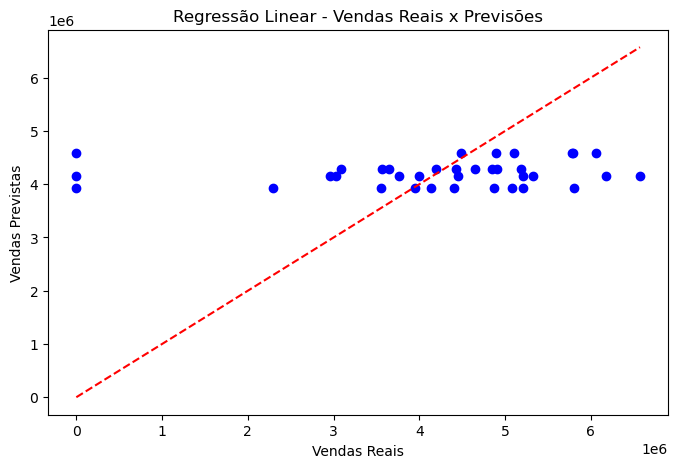

In [ ]:
# 8️⃣ VISUALIZAR RESULTADOS
plt.figure(figsize=(8,5))
plt.scatter(df['Total'], df['Previsão'], color='blue')
plt.plot([df['Total'].min(), df['Total'].max()], [df['Total'].min(), df['Total'].max()], 'r--')
plt.title('Regressão Linear - Vendas Reais x Previsões')
plt.xlabel('Vendas Reais')
plt.ylabel('Vendas Previstas')
plt.show()